In [9]:
import os
import typing as T
import pickle as pkl
import matplotlib.pyplot as plt

import cv2
import yaml
import requests
import torch
import torch.nn as nn
import numpy as np
from xarray import DataArray
from tqdm.auto import tqdm

In [10]:
image_path = "../tmp/user_input.jpeg"
image_blue_path = "/Users/gkreder/Downloads/nuclear_blue_image.jpg"

In [11]:
cv2.imread(image_path).shape

(800, 1400, 3)

In [12]:
cv2.imread(image_blue_path).shape

(730, 1000, 3)

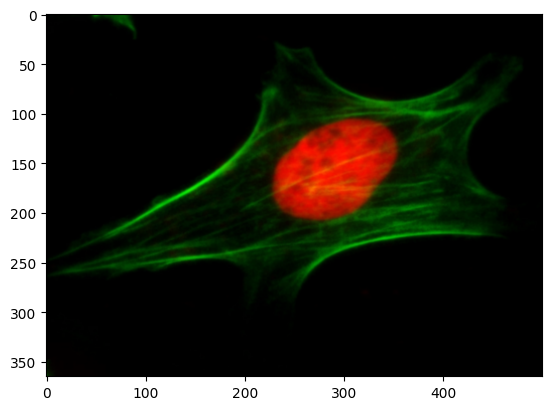

In [13]:
img = cv2.imread(image_blue_path)

plt.imshow(cv2.pyrDown(img))

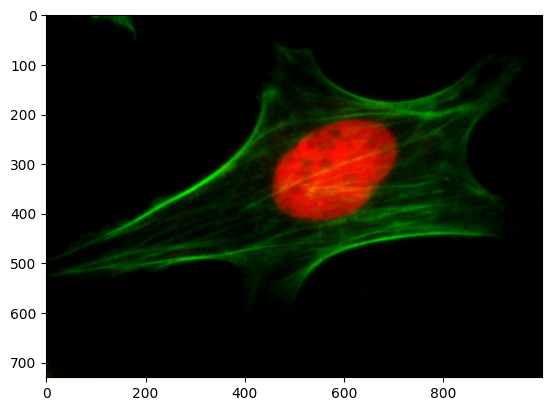

In [14]:
plt.imshow(img)

In [21]:
model_img = np.load("../tmp/image_db/input_images/affable-shark.npy")

In [25]:
model_img.shape

(1, 1, 256, 256)

In [27]:
model_img[:,:,:].shape

(1, 1, 256, 256)

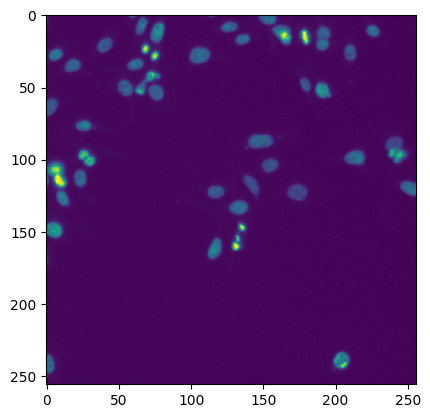

In [32]:
plt.imshow(model_img[0][0])

In [34]:
input_image = model_img
input_axes = 'bcxy'

In [35]:
def paint_image(input_image, input_format = "bcxy", output_channels = 3):
    return(input_image)

In [63]:
input_format = "bcxy"
output_channels = 3
if 'b' in input_format:
    mean_batch_image = np.mean(input_image, axis = input_format.index('b'))
input_format = ''.join([x for x in input_format.lower() if x != 'b'])
channel_index = input_format.lower().index('c')
num_channels = mean_batch_image.shape[channel_index]
for i_c in range(num_channels):
    channel_image = mean_batch_image.take(indices = i_c, axis = channel_index)
    break
# plt.imshow(paint_image(input_image)[0][0], cmap = "Set1")

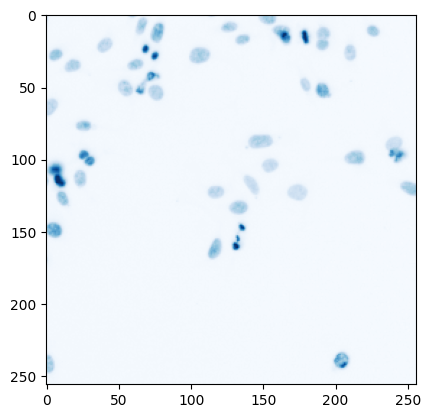

In [71]:
plt.imshow(channel_image, cmap = 'Blues')

In [124]:
from matplotlib.colors import LinearSegmentedColormap
from skimage import exposure

# Function to create a custom colormap from white to a specified color
def create_colormap(color_input: str | tuple, empty_val_rgb = (0,0,0)):
    return LinearSegmentedColormap.from_list("custom_color", [empty_val_rgb, color_input], N=256) # Change to (1,1,1) if you want white to be the empty value instead of black

green_colormap = create_colormap((0, 1, 0))  # RGB for green
blue_colormap = create_colormap((0, 0, 1))   # RGB for blue
channel_colors = [(0,0,1), (0,1,0), (1,0,0), (0,0.5,0.5), (0.5,0,0.5), (0.5,0.5,0)]
channel_rgb = np.array(channel_colors[i_c])
channel_color = create_colormap(channel_rgb, empty_val_rgb='black')


img_adapteq = exposure.equalize_adapthist(channel_image.astype('uint8'), clip_limit=0.01)
channel_color_image = channel_rgb[:, np.newaxis, np.newaxis] * img_adapteq